In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(9876789)

In [2]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)                             #predicted
y = y_true + sig * np.random.normal(size=nsample)    #observed

In [3]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           3.30e-25
Time:                        23:03:07   Log-Likelihood:                -38.308
No. Observations:                  50   AIC:                             84.62
Df Residuals:                      46   BIC:                             92.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4704      0.029     16.487      0.0

In [4]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

Parameters:  [ 0.47040466  0.2931004  -0.01826292  5.24935422]
Standard errors:  [0.02853117 0.11215937 0.00250506 0.18499717]
Predicted values:  [ 4.79278116  5.17262168  5.52726298  5.84073136  6.10281792  6.31075592
  6.46967527  6.59175976  6.69424528  6.796588    6.91726779  7.07075203
  7.26511865  7.50072896  7.77016828  8.05946415  8.35038197  8.62342091
  8.8610178   9.05043274  9.18584224  9.26929595  9.31037998  9.32464188
  9.33103621  9.34881043  9.39434252  9.47845015  9.60461339  9.76840293
  9.95820778 10.15714295 10.34582361 10.50554994 10.62137947 10.68458209
 10.69407437 10.65659757 10.58561009 10.49907624 10.41651482 10.3557922
 10.33018692 10.34620807 10.4025259  10.49019023 10.594101   10.69548911
 10.77500019 10.81587443]


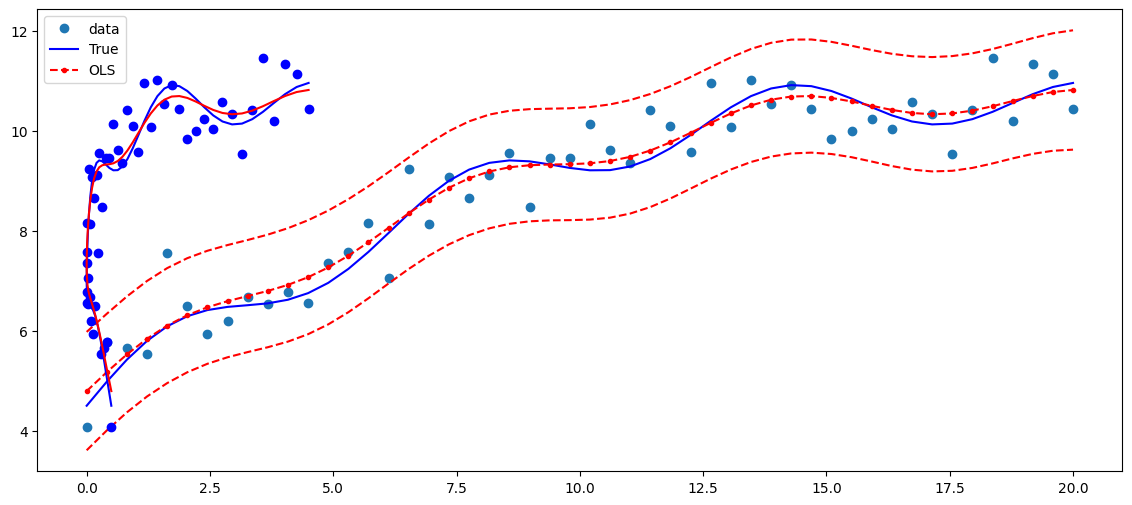

In [100]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")

# function components, plotted as x = first variable
#ax.plot(x, X[:, 0]/2, color ='pink')
#ax.plot(x, X[:, 1]/2, color ='yellow')
#ax.plot(x, -X[:, 2]/50, color ='cyan')  
#ax.plot(x, X[:, 3]*5, color ='grey')   #intercept

# scatterplots plotted as x = second variable
#ax.plot(X[:, 1], y, 'o', color ='blue')
#ax.plot(X[:, 1], y_true, color ='blue')
#ax.plot(X[:, 1], res.fittedvalues, color ='red')
#ax.plot(X[:, 1], X[:, 1]*0.5, color ='green')
#ax.plot(X[:, 1], X[:, 1]*0.2931004, color ='red')
#ax.plot(X[:, 1], y-(X[:, 0]*0.47040466 - X[:, 2]*0.01826292 + X[:, 3]*5.24935422), 'o', color ='blue')
#ax.plot(X[:, 1], y-(X[:, 0]*0.5 - X[:, 2]*0.02 + X[:, 3]*5), 'o', color ='red')

# scatterplots plotted as x = third variable
#ax.plot(X[:, 2]/50, y, 'o', color ='blue')
#ax.plot(X[:, 2]/50, y_true, color ='blue')
#ax.plot(X[:, 2]/50, res.fittedvalues, color ='red')

# scatterplots plotted as x = fourth variable
#ax.plot(X[:, 3], y, 'o', color ='blue')
#ax.plot(X[:, 3], y_true, color ='blue')
#ax.plot(X[:, 3], res.fittedvalues, color ='red')

# scatterplots, plotted as x = sum of variables
#ax.plot(X[:, 0] + X[:, 1] - X[:, 2] + X[:, 3] , X[:, 0]/2 + X[:, 1]/2 - X[:, 2]/50 + X[:, 3]*5, color ='red')
#ax.plot(X[:, 0] + X[:, 1] - X[:, 2] + X[:, 3] , X[:, 0]*res.params[0] + X[:, 1]*res.params[1] + X[:, 2]*res.params[2] + X[:, 3]*res.params[3], color ='blue')
#ax.plot(X[:, 0] + X[:, 1] - X[:, 2] + X[:, 3] , y , 'o', color ='green')



ax.legend(loc="best")

In [6]:
X[49]      # x, np.sin(x), (x - 5) ** 2, np.ones --- x = 20

array([ 20.        ,   0.91294525, 225.        ,   1.        ])

In [25]:
sum(X[49])

246.91294525072763

In [7]:
X[49] * beta     #last residual,  beta = [0.5, 0.5, -0.02, 5.0]

array([10.        ,  0.45647263, -4.5       ,  5.        ])

In [8]:
sum(X[49] * beta)

10.956472625363814

In [9]:
y_true[49]      # ideal, theoretical

10.956472625363814

In [10]:
y[49]           # measured

10.439018767433357

In [11]:
res.fittedvalues[49]     #predicted

10.815874426680136

In [21]:
sum(X[49]*res.params)

10.815874426680136

In [18]:
res.params

array([ 0.47040466,  0.2931004 , -0.01826292,  5.24935422])

In [68]:
res.params[3]

5.249354223898204

In [14]:
pred_ols.summary_frame().loc[49]

mean             10.815874
mean_se           0.239150
mean_ci_lower    10.334490
mean_ci_upper    11.297259
obs_ci_lower      9.621995
obs_ci_upper     12.009754
Name: 49, dtype: float64

In [13]:
res.fittedvalues

array([ 4.79278116,  5.17262168,  5.52726298,  5.84073136,  6.10281792,
        6.31075592,  6.46967527,  6.59175976,  6.69424528,  6.796588  ,
        6.91726779,  7.07075203,  7.26511865,  7.50072896,  7.77016828,
        8.05946415,  8.35038197,  8.62342091,  8.8610178 ,  9.05043274,
        9.18584224,  9.26929595,  9.31037998,  9.32464188,  9.33103621,
        9.34881043,  9.39434252,  9.47845015,  9.60461339,  9.76840293,
        9.95820778, 10.15714295, 10.34582361, 10.50554994, 10.62137947,
       10.68458209, 10.69407437, 10.65659757, 10.58561009, 10.49907624,
       10.41651482, 10.3557922 , 10.33018692, 10.34620807, 10.4025259 ,
       10.49019023, 10.594101  , 10.69548911, 10.77500019, 10.81587443])

In [20]:
X[49]*res.params

array([ 9.40809312,  0.26758462, -4.10915753,  5.24935422])

In [23]:
sum(X[0]*res.params)

4.7927811649707825

In [24]:
X[49]

array([ 20.        ,   0.91294525, 225.        ,   1.        ])

In [49]:
X[:, 0] + X[:, 1] + X[:, 2] + X[:, 3]

array([ 26.        ,  22.89005201,  20.04808501,  17.41959988,
        14.96976595,  12.68914357,  10.59523503,   8.72960899,
         7.15107083,   5.92600114,   5.11744955,   4.77477584,
         4.92554031,   5.57097567,   6.68578451,   8.22229561,
        10.11829616,  12.30725319,  14.72924469,  17.34080469,
        20.12206455,  23.08001734,  26.24736889,  29.67716434,
        33.43407292,  37.58376305,  42.18211314,  47.26603096,
        52.84738979,  58.91107768,  65.41748028,  72.3089894 ,
        79.51946783,  86.98511553,  94.65495179, 102.4991912 ,
       110.51413733, 118.72279002, 127.17106661, 135.92025779,
       145.03695777, 154.58212301, 164.60105727, 175.11596829,
       186.12231917, 197.58957372, 209.46621351, 221.6882022 ,
       234.18950649, 246.91294525])